In [304]:
import pandas as pd
import requests
import json
from pprint import pprint
from config import api_key
from census import Census
from us import states
import numpy as np
from scipy.stats import linregress
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Setting up lists for looping and data retrieval
start_date = [
    "2020-12-31T00:00:00Z",
    "2021-01-31T00:00:00Z",
    "2021-02-28T00:00:00Z",
    "2021-03-31T00:00:00Z",
    "2021-04-30T00:00:00Z",
    "2021-05-31T00:00:00Z",
    "2021-06-30T00:00:00Z",
    "2021-07-31T00:00:00Z",
    "2021-08-31T00:00:00Z",
    "2021-09-30T00:00:00Z",
    "2021-10-31T00:00:00Z",
    "2021-11-30T00:00:00Z"
]

end_date = [
    "2021-02-01T00:00:00Z",
    "2021-03-01T00:00:00Z",
    "2021-04-01T00:00:00Z",
    "2021-05-01T00:00:00Z",
    "2021-06-01T00:00:00Z",
    "2021-07-01T00:00:00Z",
    "2021-08-01T00:00:00Z",
    "2021-09-01T00:00:00Z",
    "2021-10-01T00:00:00Z",
    "2021-11-01T00:00:00Z",
    "2021-12-01T00:00:00Z",
    "2022-01-01T00:00:00Z"
]

month = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec"
]

## Retrieve data from COVID19 API

Ideally this data would have been retrieved within a loop however this API sometimes times out before returning data, so running each request separately is more reliable. Worth noting for any grader that may choose to execute the code again, it could take a while to execute the following 24 calls to the COVID19 API.

In [4]:
# get information on deaths for the month
jan_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[0]}&to={end_date[0]}&province=California"
jan_death_data = requests.get(jan_deaths_url).json()
jan_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Fresno',
  'CityCode': '6019',
  'Lat': '36.76',
  'Lon': '-119.65',
  'Cases': 711,
  'Status': 'deaths',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'El Dorado',
  'CityCode': '6017',
  'Lat': '38.78',
  'Lon': '-120.52',
  'Cases': 26,
  'Status': 'deaths',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mono',
  'CityCode': '6051',
  'Lat': '37.94',
  'Lon': '-118.89',
  'Cases': 3,
  'Status': 'deaths',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yolo',
  'CityCode': '6113',
  'Lat': '38.68',
  'Lon': '-121.9',
  'Cases': 117,
  'Status': 'deaths',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United Stat

In [8]:
jan_cases_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[0]}&to={end_date[0]}&province=California"
jan_case_data = requests.get(jan_cases_url).json()
jan_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Fresno',
  'CityCode': '6019',
  'Lat': '36.76',
  'Lon': '-119.65',
  'Cases': 71458,
  'Status': 'confirmed',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'El Dorado',
  'CityCode': '6017',
  'Lat': '38.78',
  'Lon': '-120.52',
  'Cases': 6014,
  'Status': 'confirmed',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mono',
  'CityCode': '6051',
  'Lat': '37.94',
  'Lon': '-118.89',
  'Cases': 880,
  'Status': 'confirmed',
  'Date': '2020-12-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yolo',
  'CityCode': '6113',
  'Lat': '38.68',
  'Lon': '-121.9',
  'Cases': 8363,
  'Status': 'confirmed',
  'Date': '2020-12-31T00:00:00Z'},
 {'Cou

In [14]:
feb_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[1]}&to={end_date[1]}&province=California"
feb_death_data = requests.get(feb_deaths_url).json()
feb_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Butte',
  'CityCode': '6007',
  'Lat': '39.67',
  'Lon': '-121.6',
  'Cases': 140,
  'Status': 'deaths',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mono',
  'CityCode': '6051',
  'Lat': '37.94',
  'Lon': '-118.89',
  'Cases': 3,
  'Status': 'deaths',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Diego',
  'CityCode': '6073',
  'Lat': '33.03',
  'Lon': '-116.74',
  'Cases': 2619,
  'Status': 'deaths',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Unassigned',
  'CityCode': '90006',
  'Lat': '0',
  'Lon': '0',
  'Cases': 0,
  'Status': 'deaths',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States o

In [23]:
feb_cases_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[1]}&to={end_date[1]}&province=California"
feb_case_data = requests.get(feb_cases_url).json()
feb_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Butte',
  'CityCode': '6007',
  'Lat': '39.67',
  'Lon': '-121.6',
  'Cases': 11731,
  'Status': 'confirmed',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mono',
  'CityCode': '6051',
  'Lat': '37.94',
  'Lon': '-118.89',
  'Cases': 1162,
  'Status': 'confirmed',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Diego',
  'CityCode': '6073',
  'Lat': '33.03',
  'Lon': '-116.74',
  'Cases': 249789,
  'Status': 'confirmed',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Unassigned',
  'CityCode': '90006',
  'Lat': '0',
  'Lon': '0',
  'Cases': 0,
  'Status': 'confirmed',
  'Date': '2021-01-31T00:00:00Z'},
 {'Country

In [27]:
mar_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[2]}&to={end_date[2]}&province=California"
mar_death_data = requests.get(mar_deaths_url).json()
mar_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Calaveras',
  'CityCode': '6009',
  'Lat': '38.21',
  'Lon': '-120.55',
  'Cases': 46,
  'Status': 'deaths',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tehama',
  'CityCode': '6103',
  'Lat': '40.13',
  'Lon': '-122.24',
  'Cases': 32,
  'Status': 'deaths',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Francisco',
  'CityCode': '6075',
  'Lat': '37.75',
  'Lon': '-122.44',
  'Cases': 417,
  'Status': 'deaths',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Madera',
  'CityCode': '6039',
  'Lat': '37.22',
  'Lon': '-119.77',
  'Cases': 199,
  'Status': 'deaths',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country':

In [31]:
mar_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[2]}&to={end_date[2]}&province=California"
mar_case_data = requests.get(mar_case_url).json()
mar_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Calaveras',
  'CityCode': '6009',
  'Lat': '38.21',
  'Lon': '-120.55',
  'Cases': 1892,
  'Status': 'confirmed',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tehama',
  'CityCode': '6103',
  'Lat': '40.13',
  'Lon': '-122.24',
  'Cases': 5075,
  'Status': 'confirmed',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Francisco',
  'CityCode': '6075',
  'Lat': '37.75',
  'Lon': '-122.44',
  'Cases': 35349,
  'Status': 'confirmed',
  'Date': '2021-02-28T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Madera',
  'CityCode': '6039',
  'Lat': '37.22',
  'Lon': '-119.77',
  'Cases': 16314,
  'Status': 'confirmed',
  'Date': '2021-02-28T00:00

In [38]:
apr_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[3]}&to={end_date[3]}&province=California"
apr_death_data = requests.get(apr_deaths_url).json()
apr_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Stanislaus',
  'CityCode': '6099',
  'Lat': '37.56',
  'Lon': '-121',
  'Cases': 938,
  'Status': 'deaths',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Kings',
  'CityCode': '6031',
  'Lat': '36.07',
  'Lon': '-119.82',
  'Cases': 239,
  'Status': 'deaths',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Mateo',
  'CityCode': '6081',
  'Lat': '37.42',
  'Lon': '-122.33',
  'Cases': 350,
  'Status': 'deaths',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Solano',
  'CityCode': '6095',
  'Lat': '38.27',
  'Lon': '-121.94',
  'Cases': 235,
  'Status': 'deaths',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'Uni

In [41]:
apr_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[3]}&to={end_date[3]}&province=California"
apr_case_url

'https://api.covid19api.com/country/united-states/status/confirmed?from=2021-03-31T00:00:00Z&to=2021-05-01T00:00:00Z&province=California'

In [49]:
apr_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[3]}&to={end_date[3]}&province=California"
apr_case_data = requests.get(apr_case_url, timeout = 120).json()
apr_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Stanislaus',
  'CityCode': '6099',
  'Lat': '37.56',
  'Lon': '-121',
  'Cases': 58409,
  'Status': 'confirmed',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Kings',
  'CityCode': '6031',
  'Lat': '36.07',
  'Lon': '-119.82',
  'Cases': 23558,
  'Status': 'confirmed',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Mateo',
  'CityCode': '6081',
  'Lat': '37.42',
  'Lon': '-122.33',
  'Cases': 40850,
  'Status': 'confirmed',
  'Date': '2021-03-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Solano',
  'CityCode': '6095',
  'Lat': '38.27',
  'Lon': '-121.94',
  'Cases': 31211,
  'Status': 'confirmed',
  'Date': '2021-03-31T00:00:00Z'

In [56]:
may_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[4]}&to={end_date[4]}&province=California"
may_death_data = requests.get(may_deaths_url, timeout = 120).json()
may_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Mateo',
  'CityCode': '6081',
  'Lat': '37.42',
  'Lon': '-122.33',
  'Cases': 380,
  'Status': 'deaths',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Shasta',
  'CityCode': '6089',
  'Lat': '40.76',
  'Lon': '-122.04',
  'Cases': 197,
  'Status': 'deaths',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Riverside',
  'CityCode': '6065',
  'Lat': '33.74',
  'Lon': '-115.99',
  'Cases': 4412,
  'Status': 'deaths',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Siskiyou',
  'CityCode': '6093',
  'Lat': '41.59',
  'Lon': '-122.54',
  'Cases': 11,
  'Status': 'deaths',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country':

In [64]:
may_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[4]}&to={end_date[4]}&province=California"
may_case_data = requests.get(may_case_url).json()
may_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Mateo',
  'CityCode': '6081',
  'Lat': '37.42',
  'Lon': '-122.33',
  'Cases': 42037,
  'Status': 'confirmed',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Shasta',
  'CityCode': '6089',
  'Lat': '40.76',
  'Lon': '-122.04',
  'Cases': 13310,
  'Status': 'confirmed',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Riverside',
  'CityCode': '6065',
  'Lat': '33.74',
  'Lon': '-115.99',
  'Cases': 300753,
  'Status': 'confirmed',
  'Date': '2021-04-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Siskiyou',
  'CityCode': '6093',
  'Lat': '41.59',
  'Lon': '-122.54',
  'Cases': 1926,
  'Status': 'confirmed',
  'Date': '2021-04-30T00:00

In [71]:
jun_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[5]}&to={end_date[5]}&province=California"
jun_death_data = requests.get(jun_deaths_url).json()
jun_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tuolumne',
  'CityCode': '6109',
  'Lat': '38.03',
  'Lon': '-119.95',
  'Cases': 63,
  'Status': 'deaths',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mariposa',
  'CityCode': '6043',
  'Lat': '37.58',
  'Lon': '-119.91',
  'Cases': 7,
  'Status': 'deaths',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Bernardino',
  'CityCode': '6071',
  'Lat': '34.84',
  'Lon': '-116.18',
  'Cases': 4758,
  'Status': 'deaths',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Plumas',
  'CityCode': '6063',
  'Lat': '40',
  'Lon': '-120.84',
  'Cases': 4,
  'Status': 'deaths',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'U

In [74]:
jun_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[5]}&to={end_date[5]}&province=California"
jun_case_data = requests.get(jun_case_url).json()
jun_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tuolumne',
  'CityCode': '6109',
  'Lat': '38.03',
  'Lon': '-119.95',
  'Cases': 4138,
  'Status': 'confirmed',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Mariposa',
  'CityCode': '6043',
  'Lat': '37.58',
  'Lon': '-119.91',
  'Cases': 454,
  'Status': 'confirmed',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Bernardino',
  'CityCode': '6071',
  'Lat': '34.84',
  'Lon': '-116.18',
  'Cases': 301897,
  'Status': 'confirmed',
  'Date': '2021-05-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Plumas',
  'CityCode': '6063',
  'Lat': '40',
  'Lon': '-120.84',
  'Cases': 701,
  'Status': 'confirmed',
  'Date': '2021-05-31T00:00:00

In [86]:
jul_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[6]}&to={end_date[6]}&province=California"
jul_death_data = requests.get(jul_deaths_url).json()
jul_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Amador',
  'CityCode': '6005',
  'Lat': '38.45',
  'Lon': '-120.66',
  'Cases': 46,
  'Status': 'deaths',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Luis Obispo',
  'CityCode': '6079',
  'Lat': '35.39',
  'Lon': '-120.4',
  'Cases': 256,
  'Status': 'deaths',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tehama',
  'CityCode': '6103',
  'Lat': '40.13',
  'Lon': '-122.24',
  'Cases': 63,
  'Status': 'deaths',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Nevada',
  'CityCode': '6057',
  'Lat': '39.3',
  'Lon': '-120.76',
  'Cases': 72,
  'Status': 'deaths',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'Un

In [93]:
jul_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[6]}&to={end_date[6]}&province=California"
jul_case_data = requests.get(jul_case_url).json()
jul_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Amador',
  'CityCode': '6005',
  'Lat': '38.45',
  'Lon': '-120.66',
  'Cases': 3788,
  'Status': 'confirmed',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Luis Obispo',
  'CityCode': '6079',
  'Lat': '35.39',
  'Lon': '-120.4',
  'Cases': 22079,
  'Status': 'confirmed',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tehama',
  'CityCode': '6103',
  'Lat': '40.13',
  'Lon': '-122.24',
  'Cases': 5706,
  'Status': 'confirmed',
  'Date': '2021-06-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Nevada',
  'CityCode': '6057',
  'Lat': '39.3',
  'Lon': '-120.76',
  'Cases': 5151,
  'Status': 'confirmed',
  'Date': '2021-06-30T00:00:00Z

In [98]:
aug_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[7]}&to={end_date[7]}&province=California"
aug_death_data = requests.get(aug_deaths_url).json()
aug_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Imperial',
  'CityCode': '6025',
  'Lat': '33.04',
  'Lon': '-115.37',
  'Cases': 743,
  'Status': 'deaths',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Bernardino',
  'CityCode': '6071',
  'Lat': '34.84',
  'Lon': '-116.18',
  'Cases': 5240,
  'Status': 'deaths',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Del Norte',
  'CityCode': '6015',
  'Lat': '41.74',
  'Lon': '-123.9',
  'Cases': 8,
  'Status': 'deaths',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Trinity',
  'CityCode': '6105',
  'Lat': '40.65',
  'Lon': '-123.11',
  'Cases': 3,
  'Status': 'deaths',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country

In [106]:
aug_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[7]}&to={end_date[7]}&province=California"
aug_case_data = requests.get(aug_case_url).json()
aug_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Imperial',
  'CityCode': '6025',
  'Lat': '33.04',
  'Lon': '-115.37',
  'Cases': 31876,
  'Status': 'confirmed',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Bernardino',
  'CityCode': '6071',
  'Lat': '34.84',
  'Lon': '-116.18',
  'Cases': 310120,
  'Status': 'confirmed',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Del Norte',
  'CityCode': '6015',
  'Lat': '41.74',
  'Lon': '-123.9',
  'Cases': 1590,
  'Status': 'confirmed',
  'Date': '2021-07-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Trinity',
  'CityCode': '6105',
  'Lat': '40.65',
  'Lon': '-123.11',
  'Cases': 466,
  'Status': 'confirmed',
  'Date': '2021-07-31T00

In [116]:
sep_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[8]}&to={end_date[8]}&province=California"
sep_death_data = requests.get(sep_deaths_url).json()
sep_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Madera',
  'CityCode': '6039',
  'Lat': '37.22',
  'Lon': '-119.77',
  'Cases': 247,
  'Status': 'deaths',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Fresno',
  'CityCode': '6019',
  'Lat': '36.76',
  'Lon': '-119.65',
  'Cases': 1801,
  'Status': 'deaths',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Lake',
  'CityCode': '6033',
  'Lat': '39.1',
  'Lon': '-122.75',
  'Cases': 74,
  'Status': 'deaths',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Los Angeles',
  'CityCode': '6037',
  'Lat': '34.31',
  'Lon': '-118.23',
  'Cases': 25284,
  'Status': 'deaths',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'Un

In [127]:
sep_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[8]}&to={end_date[8]}&province=California"
sep_case_data = requests.get(sep_case_url).json()
sep_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Madera',
  'CityCode': '6039',
  'Lat': '37.22',
  'Lon': '-119.77',
  'Cases': 20231,
  'Status': 'confirmed',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Fresno',
  'CityCode': '6019',
  'Lat': '36.76',
  'Lon': '-119.65',
  'Cases': 127634,
  'Status': 'confirmed',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Lake',
  'CityCode': '6033',
  'Lat': '39.1',
  'Lon': '-122.75',
  'Cases': 5439,
  'Status': 'confirmed',
  'Date': '2021-08-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Los Angeles',
  'CityCode': '6037',
  'Lat': '34.31',
  'Lon': '-118.23',
  'Cases': 1407317,
  'Status': 'confirmed',
  'Date': '2021-08-31T00:00:00Z

In [136]:
oct_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[9]}&to={end_date[9]}&province=California"
oct_death_data = requests.get(oct_deaths_url).json()
oct_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Modoc',
  'CityCode': '6049',
  'Lat': '41.59',
  'Lon': '-120.72',
  'Cases': 5,
  'Status': 'deaths',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Francisco',
  'CityCode': '6075',
  'Lat': '37.75',
  'Lon': '-122.44',
  'Cases': 634,
  'Status': 'deaths',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Glenn',
  'CityCode': '6021',
  'Lat': '39.6',
  'Lon': '-122.39',
  'Cases': 26,
  'Status': 'deaths',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tuolumne',
  'CityCode': '6109',
  'Lat': '38.03',
  'Lon': '-119.95',
  'Cases': 89,
  'Status': 'deaths',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'Unit

In [145]:
oct_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[9]}&to={end_date[9]}&province=California"
oct_case_data = requests.get(oct_case_url).json()
oct_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Modoc',
  'CityCode': '6049',
  'Lat': '41.59',
  'Lon': '-120.72',
  'Cases': 636,
  'Status': 'confirmed',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'San Francisco',
  'CityCode': '6075',
  'Lat': '37.75',
  'Lon': '-122.44',
  'Cases': 52544,
  'Status': 'confirmed',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Glenn',
  'CityCode': '6021',
  'Lat': '39.6',
  'Lon': '-122.39',
  'Cases': 4175,
  'Status': 'confirmed',
  'Date': '2021-09-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Tuolumne',
  'CityCode': '6109',
  'Lat': '38.03',
  'Lon': '-119.95',
  'Cases': 6448,
  'Status': 'confirmed',
  'Date': '2021-09-30T00:00:00Z'}

In [154]:
nov_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[10]}&to={end_date[10]}&province=California"
nov_death_data = requests.get(nov_deaths_url).json()
nov_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yuba',
  'CityCode': '6115',
  'Lat': '39.26',
  'Lon': '-121.35',
  'Cases': 82,
  'Status': 'deaths',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yolo',
  'CityCode': '6113',
  'Lat': '38.68',
  'Lon': '-121.9',
  'Cases': 250,
  'Status': 'deaths',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Sutter',
  'CityCode': '6101',
  'Lat': '39.03',
  'Lon': '-121.69',
  'Cases': 178,
  'Status': 'deaths',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Merced',
  'CityCode': '6047',
  'Lat': '37.19',
  'Lon': '-120.72',
  'Cases': 586,
  'Status': 'deaths',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United State

In [160]:
nov_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[10]}&to={end_date[10]}&province=California"
nov_case_data = requests.get(nov_case_url).json()
nov_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yuba',
  'CityCode': '6115',
  'Lat': '39.26',
  'Lon': '-121.35',
  'Cases': 10366,
  'Status': 'confirmed',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Yolo',
  'CityCode': '6113',
  'Lat': '38.68',
  'Lon': '-121.9',
  'Cases': 20680,
  'Status': 'confirmed',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Sutter',
  'CityCode': '6101',
  'Lat': '39.03',
  'Lon': '-121.69',
  'Cases': 14179,
  'Status': 'confirmed',
  'Date': '2021-10-31T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Merced',
  'CityCode': '6047',
  'Lat': '37.19',
  'Lon': '-120.72',
  'Cases': 43581,
  'Status': 'confirmed',
  'Date': '2021-10-31T00:00:00Z'},
 {'Co

In [167]:
dec_deaths_url = f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[11]}&to={end_date[11]}&province=California"
dec_death_data = requests.get(dec_deaths_url).json()
dec_death_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Sierra',
  'CityCode': '6091',
  'Lat': '39.58',
  'Lon': '-120.52',
  'Cases': 0,
  'Status': 'deaths',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Orange',
  'CityCode': '6059',
  'Lat': '33.7',
  'Lon': '-117.76',
  'Cases': 5725,
  'Status': 'deaths',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Lassen',
  'CityCode': '6035',
  'Lat': '40.67',
  'Lon': '-120.59',
  'Cases': 54,
  'Status': 'deaths',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Butte',
  'CityCode': '6007',
  'Lat': '39.67',
  'Lon': '-121.6',
  'Cases': 314,
  'Status': 'deaths',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United Stat

In [174]:
dec_case_url = f"https://api.covid19api.com/country/united-states/status/confirmed?from={start_date[11]}&to={end_date[11]}&province=California"
dec_case_data = requests.get(dec_case_url).json()
dec_case_data

[{'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Sierra',
  'CityCode': '6091',
  'Lat': '39.58',
  'Lon': '-120.52',
  'Cases': 216,
  'Status': 'confirmed',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Orange',
  'CityCode': '6059',
  'Lat': '33.7',
  'Lon': '-117.76',
  'Cases': 334398,
  'Status': 'confirmed',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Lassen',
  'CityCode': '6035',
  'Lat': '40.67',
  'Lon': '-120.59',
  'Cases': 7479,
  'Status': 'confirmed',
  'Date': '2021-11-30T00:00:00Z'},
 {'Country': 'United States of America',
  'CountryCode': 'US',
  'Province': 'California',
  'City': 'Butte',
  'CityCode': '6007',
  'Lat': '39.67',
  'Lon': '-121.6',
  'Cases': 25578,
  'Status': 'confirmed',
  'Date': '2021-11-30T00:00:00Z'},
 {'Co

## Compile retrieved data, find cumulative deaths and cases at end of each month, calculate new cases each month and compile into a dataframe

In [175]:
# Create lists composed of datasets
death_data = [
    jan_death_data,
    feb_death_data,
    mar_death_data,
    apr_death_data,
    may_death_data,
    jun_death_data,
    jul_death_data,
    aug_death_data,
    sep_death_data,
    oct_death_data,
    nov_death_data,
    dec_death_data
]

case_data = [
    jan_case_data,
    feb_case_data,
    mar_case_data,
    apr_case_data,
    may_case_data,
    jun_case_data,
    jul_case_data,
    aug_case_data,
    sep_case_data,
    oct_case_data,
    nov_case_data,
    dec_case_data
]

In [184]:
# Creating list of unique county names
county_finder_data = requests.get(f"https://api.covid19api.com/country/united-states/status/deaths?from={start_date[0]}&to={end_date[0]}&province=California").json()
county_finder_df = pd.DataFrame(county_finder_data)
clean_county_finder_df = county_finder_df[(county_finder_df["City"] != "Unassigned") & (county_finder_df["CityCode"] != "80006")]
#clean_county_finder_df = clean_county_finder_df[(clean_county_finder_df["CityCode"] != "80006"]
county_list = clean_county_finder_df["City"].unique()
county_list.sort()
county_list

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [185]:
# Create empty dataframe to hold all data
all_months_df = pd.DataFrame(columns=["County",
                                      "Cumulative Deaths by End of Month",
                                      "New Deaths During Month",
                                      "Cumulative Confirmed Cases by End of Month",
                                      "New Confirmed Cases During Month",
                                      "Month",
                                      "Year",
                                      "Latitude",
                                      "Longitude"]
                            )
all_months_df

Empty DataFrame
Columns: [County, Cumulative Deaths by End of Month, New Deaths During Month, Cumulative Confirmed Cases by End of Month, New Confirmed Cases During Month, Month, Year, Latitude, Longitude]
Index: []

In [186]:
# Create index to tick up through all loops
index2 = 0

# Loop through all datasets
for index, data in enumerate(death_data):
    
    # Create dataframes for death and case data for target month
    month_death_df = pd.DataFrame(data)
    month_case_df = pd.DataFrame(case_data[index])
    
    # Loop through target month dataframes
    for county in county_list:
        
        # Find cumulative deaths prior to target month, cumulative deaths at the end of the month and total deaths for the month
        county_prev_month_cum_deaths = int(month_death_df.loc[((month_death_df["City"] == county) & (month_death_df["Date"] == start_date[index])), "Cases"])
        county_month_cum_deaths = int(month_death_df.loc[((month_death_df["City"] == county) & (month_death_df["Date"] == end_date[index])), "Cases"])
        county_new_deaths = county_month_cum_deaths - county_prev_month_cum_deaths
        
        # Find cumulative cases prior to target month, cumulative cases at the end of the month and total cases for the month
        county_prev_month_cum_cases = int(month_case_df.loc[((month_case_df["City"] == county) & (month_case_df["Date"] == start_date[index])), "Cases"])
        county_month_cum_cases = int(month_case_df.loc[((month_case_df["City"] == county) & (month_case_df["Date"] == end_date[index])), "Cases"])
        county_new_cases = county_month_cum_cases - county_prev_month_cum_cases
        
        county_lat_list = month_death_df.loc[month_death_df["City"] == county, "Lat"].reset_index(drop=True)
        county_lat = county_lat_list[1]
        
        county_lon_list = month_death_df.loc[month_death_df["City"] == county, "Lon"].reset_index(drop=True)
        county_lon = county_lon_list[1]
                
        # Add values to month_df
        all_months_df.loc[index2, "County"] = county
        all_months_df.loc[index2, "Cumulative Deaths by End of Month"] = county_month_cum_deaths
        all_months_df.loc[index2, "New Deaths During Month"] = county_new_deaths
        all_months_df.loc[index2, "Cumulative Confirmed Cases by End of Month"] = county_month_cum_cases
        all_months_df.loc[index2, "New Confirmed Cases During Month"] = county_new_cases
        all_months_df.loc[index2, "Month"] = month[index]
        all_months_df.loc[index2, "Year"] = "2021"
        all_months_df.loc[index2, "Latitude"] = county_lat
        all_months_df.loc[index2, "Longitude"] = county_lon
        
        # Tick up index3
        index2 += 1
        
all_months_df

County Cumulative Deaths by End of Month New Deaths During Month  \
0      Alameda                               858                     279   
1       Alpine                                 0                       0   
2       Amador                                32                       8   
3        Butte                               141                      36   
4    Calaveras                                21                       0   
..         ...                               ...                     ...   
691     Tulare                              1160                      64   
692   Tuolumne                                91                       1   
693    Ventura                              1211                      21   
694       Yolo                               270                      13   
695       Yuba                                99                      10   

    Cumulative Confirmed Cases by End of Month  \
0                                        75947   
1                                           74   
2                                         3260   
3                                        11789   
4                                         1796   
..                                         ...   
691                                      89376   
692                                       8170   
693                                     113907   
694                                      23281   
695                                      11274   

    New Confirmed Cases During Month Month  Year Latitude Longitude  
0                              22429   Jan  2021    37.65   -121.89  
1                                  7   Jan  2021     38.6   -119.82  
2                                747   Jan  2021    38.45   -120.66  
3                               3387   Jan  2021    39.67    -121.6  
4                                632   Jan  2021    38.21   -120.55  
..                               ...   ...   ...      ...       ...  
691                             3590   Dec  2021    36.22    -118.8  
692                              413   Dec  2021    38.03   -119.95  
693                             9924   Dec  2021    34.44   -119.09  
694                             1764   Dec  2021    38.68    -121.9  
695                              508   Dec  2021    39.26   -121.35  

[696 rows x 9 columns]

## Retrieve Census Data

In [187]:
c = Census(api_key)
census_data = c.acs5.get(
    (
        "NAME",                   #
        "B19013_001E",            # Median Income
        "B19301_001E",            # Income per capita
        "B17001_002E",            # poverty: Number of persons whose income in the past 12 months is below the poverty level
        "B01002_001E",            # Median Age
        "B01003_001E",            # Total Population
        "B02001_002E",            # White Population percent
        "B02001_003E",            # Black Population percent
        "B02001_004E",            # American Indian population percent
        "B02001_005E",            # Asian population percent
        "B02001_008E",            # Population identifying as 2+ races percent
        "B03001_003E",            # Hispanic population percent
        "B08301_010E"             # Percent of population using public transport
    ), geo={"for": "county:*",
            "in": "state:{}".format(states.CA.fips)}
)

census_pd = pd.DataFrame(census_data)
census_pd

NAME  B19013_001E  B19301_001E  B17001_002E  \
0           Alameda County, California     104888.0      49883.0     152060.0   
1            Alpine County, California      85750.0      37690.0        139.0   
2             Butte County, California      54972.0      30700.0      39676.0   
3            Colusa County, California      59427.0      27614.0       2540.0   
4      Contra Costa County, California     103997.0      50118.0      93021.0   
5         El Dorado County, California      83710.0      44651.0      16018.0   
6            Fresno County, California      57109.0      25757.0     202296.0   
7          Humboldt County, California      49235.0      29584.0      26210.0   
8          Imperial County, California      46222.0      18064.0      38408.0   
9              Kern County, California      54851.0      23855.0     175902.0   
10            Kings County, California      61556.0      22919.0      21908.0   
11           Lassen County, California      56971.0      20928.0       2769.0   
12           Madera County, California      61924.0      23212.0      28062.0   
13            Marin County, California     121671.0      74446.0      17522.0   
14         Mariposa County, California      50960.0      29882.0       2668.0   
15        Mendocino County, California      52915.0      30351.0      13929.0   
16           Merced County, California      56330.0      23677.0      50124.0   
17            Modoc County, California      51250.0      25578.0       1537.0   
18         Monterey County, California      76943.0      32122.0      50052.0   
19             Napa County, California      92219.0      46912.0      10163.0   
20           Nevada County, California      68333.0      41079.0       9345.0   
21           Orange County, California      94441.0      43049.0     317682.0   
22           Placer County, California      93677.0      46023.0      27745.0   
23           Plumas County, California      57233.0      34334.0       2310.0   
24        Riverside County, California      70732.0      29913.0     300424.0   
25       Sacramento County, California      70684.0      34078.0     210174.0   
26       San Benito County, California      85808.0      33841.0       5709.0   
27   San Bernardino County, California      65761.0      26402.0     315656.0   
28        San Diego County, California      82426.0      39737.0     353841.0   
29    San Francisco County, California     119136.0      72041.0      87125.0   
30      San Joaquin County, California      68628.0      28928.0     100689.0   
31  San Luis Obispo County, California      77948.0      38686.0      29547.0   
32        San Mateo County, California     128091.0      64450.0      46923.0   
33      Santa Clara County, California     130890.0      59297.0     135771.0   
34       Santa Cruz County, California      89986.0      44278.0      31120.0   
35           Sierra County, California      52103.0      32533.0        271.0   
36           Solano County, California      84638.0      36685.0      39388.0   
37           Sonoma County, California      86173.0      44071.0      43086.0   
38           Sutter County, California      63502.0      29495.0      12460.0   
39           Tehama County, California      48895.0      29012.0      11922.0   
40           Tulare County, California      52534.0      22092.0      99610.0   
41         Tuolumne County, California      60509.0      35694.0       5564.0   
42             Yolo County, California      73746.0      36036.0      39197.0   
43             Yuba County, California      59424.0      25774.0      11420.0   
44             Mono County, California      64924.0      37103.0       1720.0   
45           Amador County, California      65187.0      33897.0       2872.0   
46        Calaveras County, California      67054.0      33027.0       5177.0   
47        Del Norte County, California      49981.0      24361.0       4223.0   
48            Glenn County, California      51682.0      23715.0 

In [400]:
census_pd = census_pd.rename(
    columns = {
        "NAME": "County",
        "B19013_001E": "Median Income",
        "B19301_001E": "Income per Capita",
        "B17001_002E": "Number of Poeple in Poverty",
        "B01002_001E": "Median Age",
        "B01003_001E": "Total Population",
        "B02001_002E": "Percent White",
        "B02001_003E": "Percent Black",
        "B02001_004E": "Percent American Indian",
        "B02001_005E": "Percent Asian",
        "B02001_008E": "Percent Identifying as Mixed Race",
        "B03001_003E": "Percent Hispanic",
        "B08301_010E": "Percent of Pop Using Public Transit"
    }
)
census_pd

County  Median Income  Income per Capita  \
0           Alameda County, California       104888.0            49883.0   
1            Alpine County, California        85750.0            37690.0   
2             Butte County, California        54972.0            30700.0   
3            Colusa County, California        59427.0            27614.0   
4      Contra Costa County, California       103997.0            50118.0   
5         El Dorado County, California        83710.0            44651.0   
6            Fresno County, California        57109.0            25757.0   
7          Humboldt County, California        49235.0            29584.0   
8          Imperial County, California        46222.0            18064.0   
9              Kern County, California        54851.0            23855.0   
10            Kings County, California        61556.0            22919.0   
11           Lassen County, California        56971.0            20928.0   
12           Madera County, California        61924.0            23212.0   
13            Marin County, California       121671.0            74446.0   
14         Mariposa County, California        50960.0            29882.0   
15        Mendocino County, California        52915.0            30351.0   
16           Merced County, California        56330.0            23677.0   
17            Modoc County, California        51250.0            25578.0   
18         Monterey County, California        76943.0            32122.0   
19             Napa County, California        92219.0            46912.0   
20           Nevada County, California        68333.0            41079.0   
21           Orange County, California        94441.0            43049.0   
22           Placer County, California        93677.0            46023.0   
23           Plumas County, California        57233.0            34334.0   
24        Riverside County, California        70732.0            29913.0   
25       Sacramento County, California        70684.0            34078.0   
26       San Benito County, California        85808.0            33841.0   
27   San Bernardino County, California        65761.0            26402.0   
28        San Diego County, California        82426.0            39737.0   
29    San Francisco County, California       119136.0            72041.0   
30      San Joaquin County, California        68628.0            28928.0   
31  San Luis Obispo County, California        77948.0            38686.0   
32        San Mateo County, California       128091.0            64450.0   
33      Santa Clara County, California       130890.0            59297.0   
34       Santa Cruz County, California        89986.0            44278.0   
35           Sierra County, California        52103.0            32533.0   
36           Solano County, California        84638.0            36685.0   
37           Sonoma County, California        86173.0            44071.0   
38           Sutter County, California        63502.0            29495.0   
39           Tehama County, California        48895.0            29012.0   
40           Tulare County, California        52534.0            22092.0   
41         Tuolumne County, California        60509.0            35694.0   
42             Yolo County, California        73746.0            36036.0   
43             Yuba County, California        59424.0            25774.0   
44             Mono County, California        64924.0            37103.0   
45           Amador County, California        65187.0            33897.0   
46        Calaveras County, California        67054.0            33027.0   
47        Del Norte County, California        49981.0            24361.0   
48            Glenn County, California        51682.0            23715.0   
49             Inyo County, California        59296.0            33404.0   
50             Lake County, California        49254.0            29714.0   
51      Los Angeles County, California        71358.0            35685.0   
52  

In [938]:
sorted_census_pd = census_pd.sort_values("County").reset_index(drop=True)
sorted_census_pd

County  Median Income  Income per Capita  \
0           Alameda County, California       104888.0            49883.0   
1            Alpine County, California        85750.0            37690.0   
2            Amador County, California        65187.0            33897.0   
3             Butte County, California        54972.0            30700.0   
4         Calaveras County, California        67054.0            33027.0   
5            Colusa County, California        59427.0            27614.0   
6      Contra Costa County, California       103997.0            50118.0   
7         Del Norte County, California        49981.0            24361.0   
8         El Dorado County, California        83710.0            44651.0   
9            Fresno County, California        57109.0            25757.0   
10            Glenn County, California        51682.0            23715.0   
11         Humboldt County, California        49235.0            29584.0   
12         Imperial County, California        46222.0            18064.0   
13             Inyo County, California        59296.0            33404.0   
14             Kern County, California        54851.0            23855.0   
15            Kings County, California        61556.0            22919.0   
16             Lake County, California        49254.0            29714.0   
17           Lassen County, California        56971.0            20928.0   
18      Los Angeles County, California        71358.0            35685.0   
19           Madera County, California        61924.0            23212.0   
20            Marin County, California       121671.0            74446.0   
21         Mariposa County, California        50960.0            29882.0   
22        Mendocino County, California        52915.0            30351.0   
23           Merced County, California        56330.0            23677.0   
24            Modoc County, California        51250.0            25578.0   
25             Mono County, California        64924.0            37103.0   
26         Monterey County, California        76943.0            32122.0   
27             Napa County, California        92219.0            46912.0   
28           Nevada County, California        68333.0            41079.0   
29           Orange County, California        94441.0            43049.0   
30           Placer County, California        93677.0            46023.0   
31           Plumas County, California        57233.0            34334.0   
32        Riverside County, California        70732.0            29913.0   
33       Sacramento County, California        70684.0            34078.0   
34       San Benito County, California        85808.0            33841.0   
35   San Bernardino County, California        65761.0            26402.0   
36        San Diego County, California        82426.0            39737.0   
37    San Francisco County, California       119136.0            72041.0   
38      San Joaquin County, California        68628.0            28928.0   
39  San Luis Obispo County, California        77948.0            38686.0   
40        San Mateo County, California       128091.0            64450.0   
41    Santa Barbara County, California        78925.0            38141.0   
42      Santa Clara County, California       130890.0            59297.0   
43       Santa Cruz County, California        89986.0            44278.0   
44           Shasta County, California        57139.0            31049.0   
45           Sierra County, California        52103.0            32533.0   
46         Siskiyou County, California        47403.0            29381.0   
47           Solano County, California        84638.0            36685.0   
48           Sonoma County, California        86173.0            44071.0   
49       Stanislaus County, California        62873.0            27225.0   
50           Sutter County, California        63502.0            29495.0   
51           Tehama County, California        48895.0            29012.0   
52  

In [939]:
sorted_census_pd["County"] = county_list
sorted_census_pd.head()

County  Median Income  Income per Capita  Number of Poeple in Poverty  \
0    Alameda       104888.0            49883.0                     152060.0   
1     Alpine        85750.0            37690.0                        139.0   
2     Amador        65187.0            33897.0                       2872.0   
3      Butte        54972.0            30700.0                      39676.0   
4  Calaveras        67054.0            33027.0                       5177.0   

   Median Age  Total Population  Percent White  Percent Black  \
0        37.8         1661584.0       631037.0       171922.0   
1        47.6            1159.0          663.0           10.0   
2        49.9           39023.0        33040.0          931.0   
3        36.9          223344.0       178568.0         3866.0   
4        52.8           45828.0        40058.0          450.0   

   Percent American Indian  Percent Asian  Percent Identifying as Mixed Race  \
0                  11037.0       519249.0                           130496.0   
1                    360.0            6.0                              111.0   
2                    276.0          375.0                             2834.0   
3                   2628.0        10743.0                            15608.0   
4                    518.0          864.0                             2912.0   

   Percent Hispanic  Percent of Pop Using Public Transit state county  
0          369546.0                             114029.0    06    001  
1             183.0                                  4.0    06    003  
2            5591.0                                 35.0    06    005  
3           37585.0                               1010.0    06    007  
4            5710.0                                142.0    06    009

In [940]:
del sorted_census_pd["state"]
del sorted_census_pd["county"]
sorted_census_pd.head()

County  Median Income  Income per Capita  Number of Poeple in Poverty  \
0    Alameda       104888.0            49883.0                     152060.0   
1     Alpine        85750.0            37690.0                        139.0   
2     Amador        65187.0            33897.0                       2872.0   
3      Butte        54972.0            30700.0                      39676.0   
4  Calaveras        67054.0            33027.0                       5177.0   

   Median Age  Total Population  Percent White  Percent Black  \
0        37.8         1661584.0       631037.0       171922.0   
1        47.6            1159.0          663.0           10.0   
2        49.9           39023.0        33040.0          931.0   
3        36.9          223344.0       178568.0         3866.0   
4        52.8           45828.0        40058.0          450.0   

   Percent American Indian  Percent Asian  Percent Identifying as Mixed Race  \
0                  11037.0       519249.0                           130496.0   
1                    360.0            6.0                              111.0   
2                    276.0          375.0                             2834.0   
3                   2628.0        10743.0                            15608.0   
4                    518.0          864.0                             2912.0   

   Percent Hispanic  Percent of Pop Using Public Transit  
0          369546.0                             114029.0  
1             183.0                                  4.0  
2            5591.0                                 35.0  
3           37585.0                               1010.0  
4            5710.0                                142.0

In [941]:
combined_data = pd.merge(all_months_df, sorted_census_pd, on="County", how="left")
combined_data

County Cumulative Deaths by End of Month New Deaths During Month  \
0      Alameda                               858                     279   
1       Alpine                                 0                       0   
2       Amador                                32                       8   
3        Butte                               141                      36   
4    Calaveras                                21                       0   
..         ...                               ...                     ...   
691     Tulare                              1160                      64   
692   Tuolumne                                91                       1   
693    Ventura                              1211                      21   
694       Yolo                               270                      13   
695       Yuba                                99                      10   

    Cumulative Confirmed Cases by End of Month  \
0                                        75947   
1                                           74   
2                                         3260   
3                                        11789   
4                                         1796   
..                                         ...   
691                                      89376   
692                                       8170   
693                                     113907   
694                                      23281   
695                                      11274   

    New Confirmed Cases During Month Month  Year Latitude Longitude  \
0                              22429   Jan  2021    37.65   -121.89   
1                                  7   Jan  2021     38.6   -119.82   
2                                747   Jan  2021    38.45   -120.66   
3                               3387   Jan  2021    39.67    -121.6   
4                                632   Jan  2021    38.21   -120.55   
..                               ...   ...   ...      ...       ...   
691                             3590   Dec  2021    36.22    -118.8   
692                              413   Dec  2021    38.03   -119.95   
693                             9924   Dec  2021    34.44   -119.09   
694                             1764   Dec  2021    38.68    -121.9   
695                              508   Dec  2021    39.26   -121.35   

     Median Income  ...  Number of Poeple in Poverty  Median Age  \
0         104888.0  ...                     152060.0        37.8   
1          85750.0  ...                        139.0        47.6   
2          65187.0  ...                       2872.0        49.9   
3          54972.0  ...                      39676.0        36.9   
4          67054.0  ...                       5177.0        52.8   
..             ...  ...                          ...         ...   
691        52534.0  ...                      99610.0        31.2   
692        60509.0  ...                       5564.0        48.7   
693        89295.0  ...                      74449.0        38.5   
694        73746.0  ...                      39197.0        31.1   
695        59424.0  ...                      11420.0        33.0   

     Total Population  Percent White  Percent Black  Percent American Indian  \
0           1661584.0       631037.0       171922.0                  11037.0   
1              1159.0          663.0           10.0                    360.0   
2             39023.0        33040.0          931.0                    276.0   
3            223344.0       178568.0         3866.0                   2628.0   
4             45828.0        40058.0          450.0                    518.0   
..                ...            ...            ...                      ...   
691          463955.0       309798.0         7606.0                   5955.0   
692           54147.0        46905.0         1007.0                    948.0   
693          845599.0       637686.0        15422.0                   6990.0   
694          218774.0   

# My Analysis

## Are minority populations impacted more than non-minority populations?

In [942]:
# Create an ethnicity df. Rename combined_data columns for accuracy
ethnic_data = combined_data[["County", "Total Population", "Percent White", "Percent Black", "Percent American Indian", "Percent Hispanic", "Percent Identifying as Mixed Race", "Percent Asian", "New Deaths During Month", "New Confirmed Cases During Month"]]
ethnic_data = ethnic_data.rename(
    columns = {
        "Percent White": "Population White",
        "Percent Black": "Population Black",
        "Percent American Indian": "Population American Indian",
        "Percent Hispanic": "Population Hispanic", 
        "Percent Identifying as Mixed Race": "Population Identifying as Mixed Race",
        "Percent Asian": "Population Asian"
    }
)
ethnic_data

County  Total Population  Population White  Population Black  \
0      Alameda         1661584.0          631037.0          171922.0   
1       Alpine            1159.0             663.0              10.0   
2       Amador           39023.0           33040.0             931.0   
3        Butte          223344.0          178568.0            3866.0   
4    Calaveras           45828.0           40058.0             450.0   
..         ...               ...               ...               ...   
691     Tulare          463955.0          309798.0            7606.0   
692   Tuolumne           54147.0           46905.0            1007.0   
693    Ventura          845599.0          637686.0           15422.0   
694       Yolo          218774.0          145299.0            5694.0   
695       Yuba           77524.0           56990.0            2632.0   

     Population American Indian  Population Hispanic  \
0                       11037.0             369546.0   
1                         360.0                183.0   
2                         276.0               5591.0   
3                        2628.0              37585.0   
4                         518.0               5710.0   
..                          ...                  ...   
691                      5955.0             301919.0   
692                       948.0               6810.0   
693                      6990.0             361648.0   
694                      1420.0              69341.0   
695                      1030.0              22318.0   

     Population Identifying as Mixed Race  Population Asian  \
0                                130496.0          519249.0   
1                                   111.0               6.0   
2                                  2834.0             375.0   
3                                 15608.0           10743.0   
4                                  2912.0             864.0   
..                                    ...               ...   
691                               37160.0           17310.0   
692                                2789.0             753.0   
693                               71894.0           61239.0   
694                               21326.0           31584.0   
695                                7561.0            5631.0   

    New Deaths During Month New Confirmed Cases During Month  
0                       279                            22429  
1                         0                                7  
2                         8                              747  
3                        36                             3387  
4                         0                              632  
..                      ...                              ...  
691                      64                             3590  
692                       1                              413  
693                      21                             9924  
694                      13                             1764  
695                      10                              508  

[696 rows x 10 columns]

In [943]:
# get percentages of each ethnicity based on populaiton and add it to ethnicity df
percent_white = ethnic_data["Population White"] / ethnic_data["Total Population"] * 100
percent_black = ethnic_data["Population Black"] / ethnic_data["Total Population"] * 100
percent_am_indian = ethnic_data["Population American Indian"] / ethnic_data["Total Population"] * 100
percent_asian = ethnic_data["Population Asian"] / ethnic_data["Total Population"] * 100
percent_mixed = ethnic_data["Population Identifying as Mixed Race"] / ethnic_data["Total Population"] * 100
percent_hispanic = ethnic_data["Population Hispanic"] / ethnic_data["Total Population"] * 100
# insert new columns
ethnic_data.insert(2, "Percent Whites", percent_white)
ethnic_data.insert(4, "Percent Blacks", percent_black)
ethnic_data.insert(6, "Percent American Indians", percent_am_indian)
ethnic_data.insert(8, "Percent Hispanics", percent_hispanic)
ethnic_data.insert(10, "Percent Mixed", percent_mixed)
ethnic_data.insert(12, "Percent Asians", percent_asian)
ethnic_data

County  Total Population  Percent Whites  Population White  \
0      Alameda         1661584.0       37.978038          631037.0   
1       Alpine            1159.0       57.204487             663.0   
2       Amador           39023.0       84.668016           33040.0   
3        Butte          223344.0       79.952002          178568.0   
4    Calaveras           45828.0       87.409444           40058.0   
..         ...               ...             ...               ...   
691     Tulare          463955.0       66.773286          309798.0   
692   Tuolumne           54147.0       86.625298           46905.0   
693    Ventura          845599.0       75.412341          637686.0   
694       Yolo          218774.0       66.415113          145299.0   
695       Yuba           77524.0       73.512719           56990.0   

     Percent Blacks  Population Black  Percent American Indians  \
0         10.346874          171922.0                  0.664246   
1          0.862813              10.0                 31.061260   
2          2.385772             931.0                  0.707275   
3          1.730962            3866.0                  1.176660   
4          0.981932             450.0                  1.130313   
..              ...               ...                       ...   
691        1.639383            7606.0                  1.283530   
692        1.859752            1007.0                  1.750790   
693        1.823796           15422.0                  0.826633   
694        2.602686            5694.0                  0.649072   
695        3.395078            2632.0                  1.328621   

     Population American Indian  Percent Hispanics  Population Hispanic  \
0                       11037.0          22.240585             369546.0   
1                         360.0          15.789474                183.0   
2                         276.0          14.327448               5591.0   
3                        2628.0          16.828301              37585.0   
4                         518.0          12.459632               5710.0   
..                          ...                ...                  ...   
691                      5955.0          65.075061             301919.0   
692                       948.0          12.576874               6810.0   
693                      6990.0          42.768262             361648.0   
694                      1420.0          31.695265              69341.0   
695                      1030.0          28.788504              22318.0   

     Percent Mixed  Population Identifying as Mixed Race  Percent Asians  \
0         7.853711                              130496.0       31.250241   
1         9.577222                                 111.0        0.517688   
2         7.262384                                2834.0        0.960972   
3         6.988323                               15608.0        4.810069   
4         6.354194                                2912.0        1.885310   
..             ...                                   ...             ...   
691       8.009397                               37160.0        3.730965   
692       5.150793                                2789.0        1.390659   
693       8.502139                               71894.0        7.242085   
694       9.747959                               21326.0       14.436816   
695       9.753109                                7561.0        7.263557   

     Population Asian New Deaths During Month New Confirmed Cases During Month  
0            519249.0                     279                            22429  
1                 6.0                       0                                7  
2               375.0                       8                              747  
3             10743.0                      36                             3387  
4               864.0                       0                              632  
..                ...                     ...                 

In [944]:
# Get percent of population identifying as not white for each county
population_minority = ethnic_data["Population Black"] + ethnic_data["Population American Indian"] + ethnic_data["Population Asian"] + ethnic_data["Population Identifying as Mixed Race"] + ethnic_data["Population Hispanic"]
percent_minority = ethnic_data["Percent Blacks"] + ethnic_data["Percent American Indians"] + ethnic_data["Percent Hispanics"] + ethnic_data["Percent Mixed"] + ethnic_data["Percent Asians"]
# insert minority column
ethnic_data.insert(16, "Population Minority", population_minority)
ethnic_data.insert(17, "Percent Minority", percent_minority)
ethnic_data

County  Total Population  Percent Whites  Population White  \
0      Alameda         1661584.0       37.978038          631037.0   
1       Alpine            1159.0       57.204487             663.0   
2       Amador           39023.0       84.668016           33040.0   
3        Butte          223344.0       79.952002          178568.0   
4    Calaveras           45828.0       87.409444           40058.0   
..         ...               ...             ...               ...   
691     Tulare          463955.0       66.773286          309798.0   
692   Tuolumne           54147.0       86.625298           46905.0   
693    Ventura          845599.0       75.412341          637686.0   
694       Yolo          218774.0       66.415113          145299.0   
695       Yuba           77524.0       73.512719           56990.0   

     Percent Blacks  Population Black  Percent American Indians  \
0         10.346874          171922.0                  0.664246   
1          0.862813              10.0                 31.061260   
2          2.385772             931.0                  0.707275   
3          1.730962            3866.0                  1.176660   
4          0.981932             450.0                  1.130313   
..              ...               ...                       ...   
691        1.639383            7606.0                  1.283530   
692        1.859752            1007.0                  1.750790   
693        1.823796           15422.0                  0.826633   
694        2.602686            5694.0                  0.649072   
695        3.395078            2632.0                  1.328621   

     Population American Indian  Percent Hispanics  Population Hispanic  \
0                       11037.0          22.240585             369546.0   
1                         360.0          15.789474                183.0   
2                         276.0          14.327448               5591.0   
3                        2628.0          16.828301              37585.0   
4                         518.0          12.459632               5710.0   
..                          ...                ...                  ...   
691                      5955.0          65.075061             301919.0   
692                       948.0          12.576874               6810.0   
693                      6990.0          42.768262             361648.0   
694                      1420.0          31.695265              69341.0   
695                      1030.0          28.788504              22318.0   

     Percent Mixed  Population Identifying as Mixed Race  Percent Asians  \
0         7.853711                              130496.0       31.250241   
1         9.577222                                 111.0        0.517688   
2         7.262384                                2834.0        0.960972   
3         6.988323                               15608.0        4.810069   
4         6.354194                                2912.0        1.885310   
..             ...                                   ...             ...   
691       8.009397                               37160.0        3.730965   
692       5.150793                                2789.0        1.390659   
693       8.502139                               71894.0        7.242085   
694       9.747959                               21326.0       14.436816   
695       9.753109                                7561.0        7.263557   

     Population Asian New Deaths During Month  \
0            519249.0                     279   
1                 6.0                       0   
2               375.0                       8   
3             10743.0                      36   
4               864.0                       0   
..                ...                     ...   
691           17310.0                      64   
692             753.0                       1   
693           61239.0                      21   
694           31584.0                      13   
695      

In [945]:
# Define a function for linear regression line
def linear_regres(x_val, y_val):
    (slope, intercept, rvalue, pvalue, stderr)  = stats.linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,5)) + "x +" + str(round(intercept,2))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_values, 'darkred', linewidth=2)
    plt.annotate(line_eq, (1,1), (300000,3000), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")

The r-value is: 0.5870380945354817


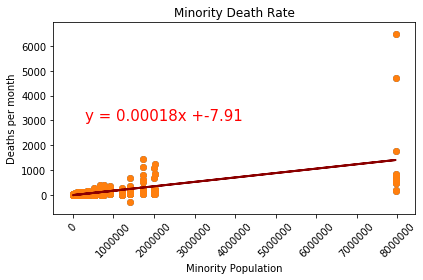

The r-value is: 0.5681720730737527


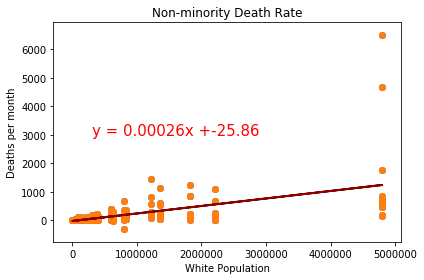

In [946]:
# Plot death rates for minority vs non-minority groups
x = ethnic_data["Population Minority"]
y = ethnic_data["New Deaths During Month"]
linear_regres(x.astype(float), y.astype(float))
plt.scatter(x, y)
plt.title('Minority Death Rate')
plt.xlabel('Minority Population')
plt.xticks(rotation=45)
plt.ylabel('Deaths per month')
plt.show()

x2 = ethnic_data["Population White"]
y2 = ethnic_data["New Deaths During Month"]
linear_regres(x2.astype(float), y2.astype(float))
plt.scatter(x2, y2)
plt.title('Non-minority Death Rate')
plt.xlabel('White Population')
plt.ylabel('Deaths per month')
plt.show()

This is raw number data that does not give an accurate result.

In [947]:
# Get deaths per 100k to normalize data
deaths_per_100k = ethnic_data["New Deaths During Month"] / ethnic_data["Total Population"] * 100000
ethnic_data.insert(17, "Deaths per 100k", deaths_per_100k)
ethnic_data

County  Total Population  Percent Whites  Population White  \
0      Alameda         1661584.0       37.978038          631037.0   
1       Alpine            1159.0       57.204487             663.0   
2       Amador           39023.0       84.668016           33040.0   
3        Butte          223344.0       79.952002          178568.0   
4    Calaveras           45828.0       87.409444           40058.0   
..         ...               ...             ...               ...   
691     Tulare          463955.0       66.773286          309798.0   
692   Tuolumne           54147.0       86.625298           46905.0   
693    Ventura          845599.0       75.412341          637686.0   
694       Yolo          218774.0       66.415113          145299.0   
695       Yuba           77524.0       73.512719           56990.0   

     Percent Blacks  Population Black  Percent American Indians  \
0         10.346874          171922.0                  0.664246   
1          0.862813              10.0                 31.061260   
2          2.385772             931.0                  0.707275   
3          1.730962            3866.0                  1.176660   
4          0.981932             450.0                  1.130313   
..              ...               ...                       ...   
691        1.639383            7606.0                  1.283530   
692        1.859752            1007.0                  1.750790   
693        1.823796           15422.0                  0.826633   
694        2.602686            5694.0                  0.649072   
695        3.395078            2632.0                  1.328621   

     Population American Indian  Percent Hispanics  Population Hispanic  \
0                       11037.0          22.240585             369546.0   
1                         360.0          15.789474                183.0   
2                         276.0          14.327448               5591.0   
3                        2628.0          16.828301              37585.0   
4                         518.0          12.459632               5710.0   
..                          ...                ...                  ...   
691                      5955.0          65.075061             301919.0   
692                       948.0          12.576874               6810.0   
693                      6990.0          42.768262             361648.0   
694                      1420.0          31.695265              69341.0   
695                      1030.0          28.788504              22318.0   

     Percent Mixed  Population Identifying as Mixed Race  Percent Asians  \
0         7.853711                              130496.0       31.250241   
1         9.577222                                 111.0        0.517688   
2         7.262384                                2834.0        0.960972   
3         6.988323                               15608.0        4.810069   
4         6.354194                                2912.0        1.885310   
..             ...                                   ...             ...   
691       8.009397                               37160.0        3.730965   
692       5.150793                                2789.0        1.390659   
693       8.502139                               71894.0        7.242085   
694       9.747959                               21326.0       14.436816   
695       9.753109                                7561.0        7.263557   

     Population Asian New Deaths During Month  \
0            519249.0                     279   
1                 6.0                       0   
2               375.0                       8   
3             10743.0                      36   
4               864.0                       0   
..                ...                     ...   
691           17310.0                      64   
692             753.0                       1   
693           61239.0                      21   
694           31584.0                      13   
695      

In [948]:
# Define a function for linear regression line with normalized data
def linear_regres_perc(x_val, y_val):
    (slope, intercept, rvalue, pvalue, stderr)  = stats.linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,5)) + "x +" + str(round(intercept,2))
    plt.scatter(x_val, y_val)
    plt.plot(x_val, regress_values, 'darkred', linewidth=2)
    plt.annotate(line_eq, (60,60), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    print(f"The p-value is: {pvalue}")

The r-value is: 0.1013718543500608
The p-value is: 0.0074403633055689904


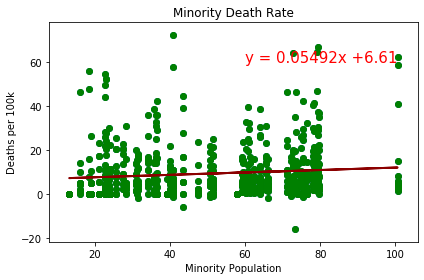

The r-value is: -0.0328535157925486
The p-value is: 0.38681326065099164


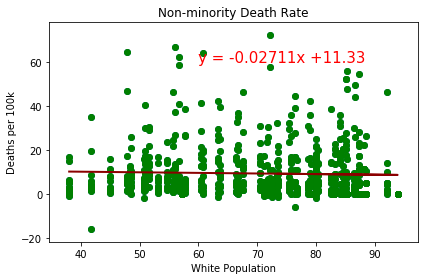

In [949]:
# Plot death rates for minority vs non-minority groups (percentages)
x = ethnic_data["Percent Minority"]
y = ethnic_data["Deaths per 100k"]
linear_regres_perc(x.astype(float), y.astype(float))
plt.scatter(x, y, color='green')
plt.title('Minority Death Rate')
plt.xlabel('Minority Population')
plt.ylabel('Deaths per 100k')
plt.show()

x2 = ethnic_data["Percent Whites"]
y2 = ethnic_data["Deaths per 100k"]
linear_regres_perc(x2.astype(float), y2.astype(float))
plt.scatter(x2, y2, color='green')
plt.title('Non-minority Death Rate')
plt.xlabel('White Population')
plt.ylabel('Deaths per 100k')
plt.show()

In [775]:
# answer to hypothesis
# get death rate vs ethnicity
try:
    death_rate_white = ethnic_data["New Deaths During Month"] / ethnic_data["Population White"] * 100
    death_rate_black = ethnic_data["New Deaths During Month"] / ethnic_data["Population Black"] * 100
    death_rate_am_indian = ethnic_data["New Deaths During Month"] / ethnic_data["Population American Indian"] * 100
    death_rate_hispanic = ethnic_data["New Deaths During Month"] / ethnic_data["Population Hispanic"] * 100
    death_rate_asian = ethnic_data["New Deaths During Month"] / ethnic_data["Population Asian"] * 100
    death_rate_mixed = ethnic_data["New Deaths During Month"] / ethnic_data["Population Identifying as Mixed Race"] * 100
except ZeroDivisionError:
    death_rate_asian = 0
    
ethnic_data.insert(15, "Death Rates White", death_rate_white)
ethnic_data.insert(16, "Death Rates Blacks", death_rate_black)
ethnic_data.insert(17, "Death Rates American Indians", death_rate_am_indian)
ethnic_data.insert(18, "Death Rates Hispanics", death_rate_hispanic)
ethnic_data.insert(19, "Death Rates Asians", death_rate_asian)
ethnic_data.insert(20, "Death Rates Mixed ethnicity", death_rate_mixed)
ethnic_data


County  Total Population  Percent Whites  Population White  \
0      Alameda         1661584.0       37.978038          631037.0   
1       Alpine            1159.0       57.204487             663.0   
2       Amador           39023.0       84.668016           33040.0   
3        Butte          223344.0       79.952002          178568.0   
4    Calaveras           45828.0       87.409444           40058.0   
..         ...               ...             ...               ...   
691     Tulare          463955.0       66.773286          309798.0   
692   Tuolumne           54147.0       86.625298           46905.0   
693    Ventura          845599.0       75.412341          637686.0   
694       Yolo          218774.0       66.415113          145299.0   
695       Yuba           77524.0       73.512719           56990.0   

     Percent Blacks  Population Black  Percent American Indians  \
0         10.346874          171922.0                  0.664246   
1          0.862813              10.0                 31.061260   
2          2.385772             931.0                  0.707275   
3          1.730962            3866.0                  1.176660   
4          0.981932             450.0                  1.130313   
..              ...               ...                       ...   
691        1.639383            7606.0                  1.283530   
692        1.859752            1007.0                  1.750790   
693        1.823796           15422.0                  0.826633   
694        2.602686            5694.0                  0.649072   
695        3.395078            2632.0                  1.328621   

     Population American Indian  Percent Hispanics  Population Hispanic  ...  \
0                       11037.0          31.250241             369546.0  ...   
1                         360.0           0.517688                183.0  ...   
2                         276.0           0.960972               5591.0  ...   
3                        2628.0           4.810069              37585.0  ...   
4                         518.0           1.885310               5710.0  ...   
..                          ...                ...                  ...  ...   
691                      5955.0           3.730965             301919.0  ...   
692                       948.0           1.390659               6810.0  ...   
693                      6990.0           7.242085             361648.0  ...   
694                      1420.0          14.436816              69341.0  ...   
695                      1030.0           7.263557              22318.0  ...   

     Percent Asians  Population Asian  New Deaths During Month  \
0         22.240585          519249.0                      279   
1         15.789474               6.0                        0   
2         14.327448             375.0                        8   
3         16.828301           10743.0                       36   
4         12.459632             864.0                        0   
..              ...               ...                      ...   
691       65.075061           17310.0                       64   
692       12.576874             753.0                        1   
693       42.768262           61239.0                       21   
694       31.695265           31584.0                       13   
695       28.788504            5631.0                       10   

     Death Rates White Death Rates Blacks Death Rates American Indians  \
0            0.0442129           0.162283                      2.52786   
1                    0                  0                            0   
2            0.0242131           0.859291                      2.89855   
3            0.0201604           0.931195                      1.36986   
4                    0                  0                            0   
..                 ...                ...                          ...   
691          0.0206586           0.841441                      1.07473   
692         0.00

In [749]:
# get the sum of deaths based on ethnicity for visualization
sum_of_deaths = ethnic_data[["Death Rates White", "Death Rates Blacks", "Death Rates Asians", "Death Rates American Indians", "Death Rates Mixed ethnicity"]].sum()
print(sum_of_deaths)


Death Rates White                 9.849646
Death Rates Blacks              397.065993
Death Rates Asians                0.000000
Death Rates American Indians    640.355644
Death Rates Mixed ethnicity       0.968850
dtype: float64


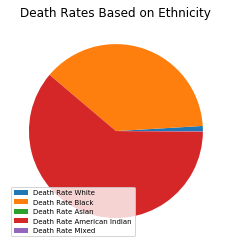

In [751]:
# create a visualization for death rates based on ethnicity
y=np.array(sum_of_deaths)
my_labels=["Death Rate White", "Death Rate Black", "Death Rate Asian", "Death Rate American Indian", "Death Rate Mixed"]
plt.pie(y)
plt.legend(labels=my_labels, loc='lower left', prop={'size': 7})
plt.title("Death Rates Based on Ethnicity")
plt.show()

Based on the data, the death rate of people who identify as American Indians is much higher than any other ethnic group across all counties. This data is not normalized.

## Does lower median income result in higher death rates?

In [620]:
# Get average income data for each county
county_income = combined_data.groupby(["County"]).mean()[["Median Income"]]
county_income

Median Income
County                        
Alameda               104888.0
Alpine                 85750.0
Amador                 65187.0
Butte                  54972.0
Calaveras              67054.0
Colusa                 59427.0
Contra Costa          103997.0
Del Norte              49981.0
El Dorado              83710.0
Fresno                 57109.0
Glenn                  51682.0
Humboldt               49235.0
Imperial               46222.0
Inyo                   59296.0
Kern                   54851.0
Kings                  61556.0
Lake                   49254.0
Lassen                 56971.0
Los Angeles            71358.0
Madera                 61924.0
Marin                 121671.0
Mariposa               50960.0
Mendocino              52915.0
Merced                 56330.0
Modoc                  51250.0
Mono                   64924.0
Monterey               76943.0
Napa                   92219.0
Nevada                 68333.0
Orange                 94441.0
Placer                 93677.0
Plumas                 57233.0
Riverside              70732.0
Sacramento             70684.0
San Benito             85808.0
San Bernardino         65761.0
San Diego              82426.0
San Francisco         119136.0
San Joaquin            68628.0
San Luis Obispo        77948.0
San Mateo             128091.0
Santa Barbara          78925.0
Santa Clara           130890.0
Santa Cruz             89986.0
Shasta                 57139.0
Sierra                 52103.0
Siskiyou               47403.0
Solano                 84638.0
Sonoma                 86173.0
Stanislaus             62873.0
Sutter                 63502.0
Tehama                 48895.0
Trinity                41780.0
Tulare                 52534.0
Tuolumne               60509.0
Ventura                89295.0
Yolo                   73746.0
Yuba                   59424.0

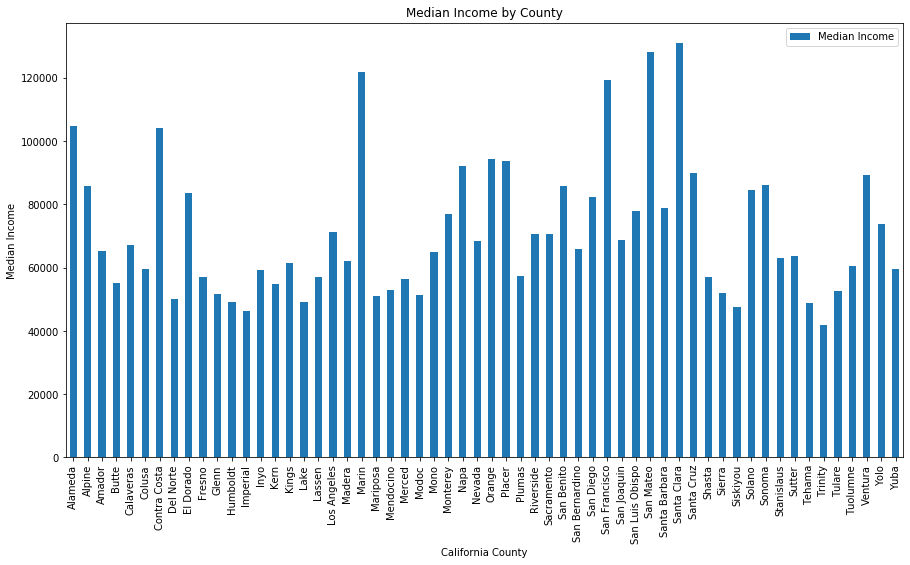

In [621]:
# Create barchart of median income by county
county_income.plot.bar(y="Median Income", figsize = (15,8))
plt.title("Median Income by County")
plt.xlabel("California County")
plt.ylabel("Median Income")
plt.show()

In [590]:
# get county with highest median income
max_median_income = combined_data["Median Income"].max()
max_county = combined_data.loc[combined_data["Median Income"] == max_median_income]
max_county

County Cumulative Deaths by End of Month New Deaths During Month  \
42   Santa Clara                              1343                     678   
100  Santa Clara                              1704                     374   
158  Santa Clara                              1874                     170   
216  Santa Clara                              1988                     114   
274  Santa Clara                              2057                      69   
332  Santa Clara                              2090                      33   
390  Santa Clara                              2183                      93   
448  Santa Clara                              1796                    -303   
506  Santa Clara                              1862                      69   
564  Santa Clara                              1908                      46   
622  Santa Clara                              1929                      26   
680  Santa Clara                              1969                      44   

    Cumulative Confirmed Cases by End of Month  \
42                                      102935   
100                                     111260   
158                                     115250   
216                                     118990   
274                                     120274   
332                                     119733   
390                                     124357   
448                                     135866   
506                                     142366   
564                                     147305   
622                                     152511   
680                                     167415   

    New Confirmed Cases During Month Month  Year Latitude Longitude  \
42                             32597   Jan  2021    37.23    -121.7   
100                             8810   Feb  2021    37.23    -121.7   
158                             4121   Mar  2021    37.23    -121.7   
216                             3847   Apr  2021    37.23    -121.7   
274                             1383   May  2021    37.23    -121.7   
332                             -528   Jun  2021    37.23    -121.7   
390                             4663   Jul  2021    37.23    -121.7   
448                            12408   Aug  2021    37.23    -121.7   
506                             6725   Sep  2021    37.23    -121.7   
564                             4942   Oct  2021    37.23    -121.7   
622                             5370   Nov  2021    37.23    -121.7   
680                            15084   Dec  2021    37.23    -121.7   

     Median Income  ...  Number of Poeple in Poverty  Median Age  \
42        130890.0  ...                     135771.0        37.2   
100       130890.0  ...                     135771.0        37.2   
158       130890.0  ...                     135771.0        37.2   
216       130890.0  ...                     135771.0        37.2   
274       130890.0  ...                     135771.0        37.2   
332       130890.0  ...                     135771.0        37.2   
390       130890.0  ...                     135771.0        37.2   
448       130890.0  ...                     135771.0        37.2   
506       130890.0  ...                     135771.0        37.2   
564       130890.0  ...                     135771.0        37.2   
622       130890.0  ...                     135771.0        37.2   
680       130890.0  ...                     135771.0        37.2   

     Total Population  Percent White  Percent Black  Percent American Indian  \
42          1924379.0       801381.0        47379.0                   9990.0   
100         1924379.0       801381.0        47379.0                   9990.0   
158         1924379.0       801381.0        47379.0                   9990.0   
216         1924379.0       801381.0        47379.0                   9990.0   
274         1924379.0       801381.0        47379.0                   9990.0   
332         1924379.0       801381.0        47379.0    

In [833]:
# get county with lowest median income
min_median_income = combined_data["Median Income"].min()
min_income_data = combined_data.loc[combined_data["Median Income"] == min_median_income]
min_income_data.head()

County Cumulative Deaths by End of Month New Deaths During Month  \
52   Trinity                                 3                       1   
110  Trinity                                 3                       0   
168  Trinity                                 3                       0   
226  Trinity                                 3                       0   
284  Trinity                                 3                       0   

    Cumulative Confirmed Cases by End of Month  \
52                                         323   
110                                        374   
168                                        400   
226                                        408   
284                                        419   

    New Confirmed Cases During Month Month  Year Latitude Longitude  \
52                                24   Jan  2021    40.65   -123.11   
110                               51   Feb  2021    40.65   -123.11   
168                               26   Mar  2021    40.65   -123.11   
226                                8   Apr  2021    40.65   -123.11   
284                               11   May  2021    40.65   -123.11   

     Median Income  ...  Number of Poeple in Poverty  Median Age  \
52         41780.0  ...                       2860.0        52.4   
110        41780.0  ...                       2860.0        52.4   
168        41780.0  ...                       2860.0        52.4   
226        41780.0  ...                       2860.0        52.4   
284        41780.0  ...                       2860.0        52.4   

     Total Population  Percent White  Percent Black  Percent American Indian  \
52            12541.0        10694.0           65.0                    722.0   
110           12541.0        10694.0           65.0                    722.0   
168           12541.0        10694.0           65.0                    722.0   
226           12541.0        10694.0           65.0                    722.0   
284           12541.0        10694.0           65.0                    722.0   

     Percent Asian  Percent Identifying as Mixed Race  Percent Hispanic  \
52           244.0                              332.0             933.0   
110          244.0                              332.0             933.0   
168          244.0                              332.0             933.0   
226          244.0                              332.0             933.0   
284          244.0                              332.0             933.0   

     Percent of Pop Using Public Transit  
52                                  61.0  
110                                 61.0  
168                                 61.0  
226                                 61.0  
284                                 61.0  

[5 rows x 21 columns]

In [842]:
# death rate vs population in Trinity
death_rate_overall_min = np.mean(min_income_data["New Deaths During Month"].mean() / min_income_data["Total Population"] * 100)
death_rate_overall_min

0.011296281529915212

In [845]:
death_rate_infected_min = np.mean(min_income_data["New Deaths During Month"].mean() / 
                                  min_income_data["New Confirmed Cases During Month"] * 100)
death_rate_infected_min

5.418093325813923

In [840]:
# get death rate vs population for Santa Clara
death_rate_overall_max = np.mean(max_county["New Deaths During Month"].mean() / max_county["Total Population"] * 100)
death_rate_overall_max

0.006118857044272465

In [844]:
# death rate vs infected for Santa Clara
death_rate_infected_max = np.mean(max_county["New Deaths During Month"].mean() / 
                                  max_county["New Confirmed Cases During Month"] * 100)
death_rate_infected_max

0.3675001618757905

The death rate for Trinity County, which has the lowest median income in California, is 0.01%. The death rate for Santa Clara county, which has the highest median income in the state, is 0.006%. 
Of those infected with Covid-19, 5.42% of the Trinity County population died while only .37% of the Santa Clara population died. Our hypothesis is correct that counties with a lower median income will result in more deaths per capita from Covid-19 than counties with a higher median income. 

In [607]:
# Get January data
jan_data = combined_data.loc[combined_data["Month"] == "Jan"]
jan_data

County Cumulative Deaths by End of Month New Deaths During Month  \
0           Alameda                               858                     279   
1            Alpine                                 0                       0   
2            Amador                                32                       8   
3             Butte                               141                      36   
4         Calaveras                                21                       0   
5            Colusa                                 9                       2   
6      Contra Costa                               531                     195   
7         Del Norte                                 2                       0   
8         El Dorado                                83                      57   
9            Fresno                               994                     283   
10            Glenn                                14                       5   
11         Humboldt                                25                       4   
12         Imperial                               530                     113   
13             Inyo                                27                       7   
14             Kern                               624                     112   
15            Kings                               172                      64   
16             Lake                                33                      10   
17           Lassen                                16                       5   
18      Los Angeles                             16857                    6498   
19           Madera                                94                      30   
20            Marin                               188                      40   
21         Mariposa                                 5                       1   
22        Mendocino                                37                      13   
23           Merced                               337                     111   
24            Modoc                                 1                       1   
25             Mono                                 3                       0   
26         Monterey                               278                      90   
27             Napa                                52                      24   
28           Nevada                                20                       5   
29           Orange                              3109                    1234   
30           Placer                               204                      78   
31           Plumas                                 2                       1   
32        Riverside                              3092                    1134   
33       Sacramento                              1193                     363   
34       San Benito                                48                      20   
35   San Bernardino                              2172                     586   
36        San Diego                              2619                    1085   
37    San Francisco                               324                     141   
38      San Joaquin                               877                     231   
39  San Luis Obispo                               199                     110   
40        San Mateo                               220                      28   
41    Santa Barbara                               297                     136   
42      Santa Clara                              1343                     678   
43       Santa Cruz                               149                      65   
44           Shasta                               112                      43   
45           Sierra                                 0                       0   
46         Siskiyou                                 4                       1   
47           Solano                               117                      20   
48           Sonoma                         

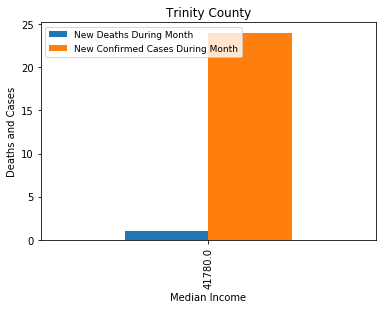

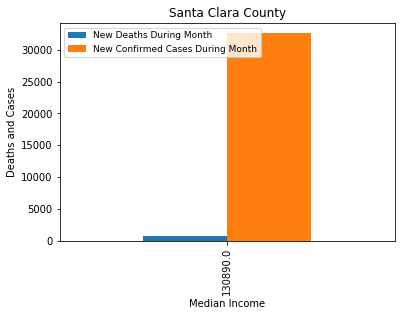

In [650]:
# visualization of cases and deaths vs income of max and min counties
min_trinity = jan_data.loc[jan_data['County'] == 'Trinity']
max_santaclara = jan_data.loc[jan_data['County'] == 'Santa Clara']
min_income_data = min_trinity[["New Deaths During Month", "New Confirmed Cases During Month", "Median Income"]]
min_income_data.plot.bar("Median Income")
plt.legend(loc='upper left', prop={'size': 9})
plt.title("Trinity County")
plt.xlabel("Median Income")
plt.ylabel("Deaths and Cases")
max_income_data = max_santaclara[["New Deaths During Month", "New Confirmed Cases During Month", "Median Income"]]
max_income_data.plot.bar("Median Income")
plt.legend(loc='upper left', prop={'size': 9})
plt.title("Santa Clara County")
plt.xlabel("Median Income")
plt.ylabel("Deaths and Cases")
plt.show()

In [950]:
jan_ethnicity_data = monthly_data.groupby(["County"])[["Percent White", "Percent Black", "Percent American Indian", "Percent Hispanic", "Percent Identifying as Mixed Race", "New Deaths During Month"]]
jan_ethnicity_data

In [951]:
ethnicity_data = combined_data.groupby(["County"]).mean()[["Percent White", "Percent Black", "Percent American Indian", "Percent Hispanic", "Percent Identifying as Mixed Race"]]
ethnicity_data.head()

Percent White  Percent Black  Percent American Indian  \
County                                                             
Alameda         631037.0       171922.0                  11037.0   
Alpine             663.0           10.0                    360.0   
Amador           33040.0          931.0                    276.0   
Butte           178568.0         3866.0                   2628.0   
Calaveras        40058.0          450.0                    518.0   

           Percent Hispanic  Percent Identifying as Mixed Race  
County                                                          
Alameda            369546.0                           130496.0  
Alpine                183.0                              111.0  
Amador               5591.0                             2834.0  
Butte               37585.0                            15608.0  
Calaveras            5710.0                             2912.0